# Stacking Model Exercise

https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones#train.csv

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
rs = 77

In [5]:
data1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data2 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data = pd.concat([data1, data2])

In [6]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [7]:
print(data.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.3+ MB


In [9]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


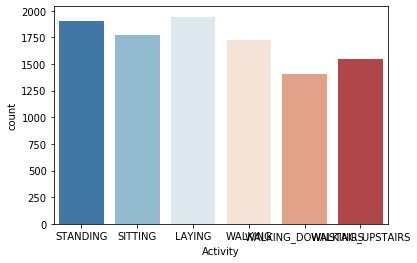

In [10]:
sns.countplot(x='Activity', data=data, palette='RdBu_r')

In [11]:
pd.unique(data['Activity'])

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [12]:
#data = data.replace({'STANDING':1, 'SITTING':2, 'LAYING':3, 'WALKING':4, 'WALKING_DOWNSTAIRS':5,'WALKING_UPSTAIRS':6})

In [13]:
X = data.drop(['Activity'],axis=1)
y = data['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=rs)

# KNN

In [14]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[562   1   0   0   0   0]
 [  1 479  64   0   0   2]
 [  0  32 573   0   0   0]
 [  0   0   0 502   1   0]
 [  0   0   0   2 402   2]
 [  0   0   0   0   0 467]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       563
           SITTING       0.94      0.88      0.91       546
          STANDING       0.90      0.95      0.92       605
           WALKING       1.00      1.00      1.00       503
WALKING_DOWNSTAIRS       1.00      0.99      0.99       406
  WALKING_UPSTAIRS       0.99      1.00      1.00       467

          accuracy                           0.97      3090
         macro avg       0.97      0.97      0.97      3090
      weighted avg       0.97      0.97      0.97      3090



# DecisionTree

In [15]:
classifier = DecisionTreeClassifier(random_state=rs)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[563   0   0   0   0   0]
 [  0 500  46   0   0   0]
 [  0  49 556   0   0   0]
 [  0   0   0 473  10  20]
 [  0   0   0   8 384  14]
 [  0   0   0  20  25 422]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       563
           SITTING       0.91      0.92      0.91       546
          STANDING       0.92      0.92      0.92       605
           WALKING       0.94      0.94      0.94       503
WALKING_DOWNSTAIRS       0.92      0.95      0.93       406
  WALKING_UPSTAIRS       0.93      0.90      0.91       467

          accuracy                           0.94      3090
         macro avg       0.94      0.94      0.94      3090
      weighted avg       0.94      0.94      0.94      3090



# Logistic Regresstion

In [16]:
classifier = LogisticRegression(random_state=rs)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[563   0   0   0   0   0]
 [  0 513  30   0   0   3]
 [  0  25 580   0   0   0]
 [  0   0   0 502   0   1]
 [  0   0   0   1 405   0]
 [  0   0   0   1   0 466]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       563
           SITTING       0.95      0.94      0.95       546
          STANDING       0.95      0.96      0.95       605
           WALKING       1.00      1.00      1.00       503
WALKING_DOWNSTAIRS       1.00      1.00      1.00       406
  WALKING_UPSTAIRS       0.99      1.00      0.99       467

          accuracy                           0.98      3090
         macro avg       0.98      0.98      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



# Random Forest

In [17]:
classifier = RandomForestClassifier(random_state=rs)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[563   0   0   0   0   0]
 [  0 522  23   1   0   0]
 [  0  35 570   0   0   0]
 [  0   0   0 492   4   7]
 [  0   0   0   9 388   9]
 [  0   0   0   6   6 455]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       563
           SITTING       0.94      0.96      0.95       546
          STANDING       0.96      0.94      0.95       605
           WALKING       0.97      0.98      0.97       503
WALKING_DOWNSTAIRS       0.97      0.96      0.97       406
  WALKING_UPSTAIRS       0.97      0.97      0.97       467

          accuracy                           0.97      3090
         macro avg       0.97      0.97      0.97      3090
      weighted avg       0.97      0.97      0.97      3090



# SVM

In [18]:
classifier = SVC(random_state=rs)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[563   0   0   0   0   0]
 [  1 471  73   0   0   1]
 [  0  50 555   0   0   0]
 [  0   0   0 496   1   6]
 [  0   0   0   2 396   8]
 [  0   0   0   8   4 455]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       563
           SITTING       0.90      0.86      0.88       546
          STANDING       0.88      0.92      0.90       605
           WALKING       0.98      0.99      0.98       503
WALKING_DOWNSTAIRS       0.99      0.98      0.98       406
  WALKING_UPSTAIRS       0.97      0.97      0.97       467

          accuracy                           0.95      3090
         macro avg       0.95      0.95      0.95      3090
      weighted avg       0.95      0.95      0.95      3090



# Stacking Model

In [19]:
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.3,random_state=rs)
train_all = X_train_all
train_all['Activity'] = y_train_all

In [20]:
X_train = train_all.drop(['Activity'],axis=1)
y_train = train_all['Activity']

In [21]:
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train, y_train, test_size=0.5,random_state=rs)

In [22]:
clf1 = LogisticRegression(random_state=rs)
clf2 = RandomForestClassifier(random_state=rs)
clf3 = SVC(random_state=rs)
clf4 = KNeighborsClassifier(n_neighbors=5)

clf1.fit(X_train_1, y_train_1)
clf2.fit(X_train_1, y_train_1)
clf3.fit(X_train_1, y_train_1)
clf4.fit(X_train_1, y_train_1)

y_pred_clf1 = clf1.predict(X_train_2)
y_pred_clf2 = clf2.predict(X_train_2)
y_pred_clf3 = clf3.predict(X_train_2)
y_pred_clf4 = clf4.predict(X_train_2)


In [23]:
x_for_level_2 = pd.DataFrame(data={'clf1': y_pred_clf1, 'clf2': y_pred_clf2,'clf3': y_pred_clf3,'clf4': y_pred_clf4})
print(x_for_level_2.head())
x_for_level_2 = pd.get_dummies(x_for_level_2,drop_first = True)
print(x_for_level_2.head())

       clf1      clf2      clf3      clf4
0  STANDING  STANDING  STANDING  STANDING
1   SITTING   SITTING   SITTING   SITTING
2   SITTING   SITTING   SITTING   SITTING
3   SITTING   SITTING  STANDING   SITTING
4    LAYING    LAYING    LAYING    LAYING
   clf1_SITTING  clf1_STANDING  clf1_WALKING  clf1_WALKING_DOWNSTAIRS  \
0             0              1             0                        0   
1             1              0             0                        0   
2             1              0             0                        0   
3             1              0             0                        0   
4             0              0             0                        0   

   clf1_WALKING_UPSTAIRS  clf2_SITTING  clf2_STANDING  clf2_WALKING  \
0                      0             0              1             0   
1                      0             1              0             0   
2                      0             1              0             0   
3                      0 

In [24]:
clf_blen = RandomForestClassifier(random_state=rs)
clf_blen.fit(x_for_level_2, y_train_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=77, verbose=0,
                       warm_start=False)

In [25]:
y_pred_clf1 = clf1.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)
y_pred_clf3 = clf3.predict(X_test)
y_pred_clf4 = clf4.predict(X_test)

x_for_level_2_test = pd.DataFrame(data={'clf1': y_pred_clf1, 'clf2': y_pred_clf2,'clf3': y_pred_clf3,'clf4': y_pred_clf4})
x_for_level_2_test = pd.get_dummies(x_for_level_2_test,drop_first = True)

#print(x_for_level_2_test.head())
y_pred = clf_blen.predict(x_for_level_2_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[563   0   0   0   0   0]
 [  0 522  22   0   0   2]
 [  0  33 572   0   0   0]
 [  0   0   0 502   0   1]
 [  0   0   0   0 404   2]
 [  0   0   0   4   0 463]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       563
           SITTING       0.94      0.96      0.95       546
          STANDING       0.96      0.95      0.95       605
           WALKING       0.99      1.00      1.00       503
WALKING_DOWNSTAIRS       1.00      1.00      1.00       406
  WALKING_UPSTAIRS       0.99      0.99      0.99       467

          accuracy                           0.98      3090
         macro avg       0.98      0.98      0.98      3090
      weighted avg       0.98      0.98      0.98      3090

